<img src="Header Curso 2.png" width="921" height="89" align="center"/>

<h1><center>Modelos predictivos con Machine Learning - AnáhuacX</center></h1>
<h2><center>Actividad 3: Optimización de modelos</center></h2>


En el siguiente ejercicio practicarás algunos de los comandos vistos durante la semana. Después de terminar tu practica responderás un formulario donde autoevaluaras tu desarrollo. <strong>Al finalizar deberás subir tu cuaderno en un archivo .zip</strong>. Es muy importante que subas tu cuaderno de la manera en cómo se indica.

En esta actividad responderás la pregunta: 
¿Como optimizar nuestros modelos de predicción con Python? Para responderla deberás seguir los pasos a detalle.


<h3><center>Instrucciones</center></h3>

1. Ejecuta la siguiente linea de código para cargas las librerías fundamentales que se utilzarán durante el ejercicio y asegurar la reproducibilidad del mismo.

In [3]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1) ## No muevas este parámetro, nos aseguramos de que tus resultados (si haces bien el ejercicio) 
         ## estén alineados con las opciones de la plataforma de edX.

<h4>Aplicando la regresión</h4>

2. Descarga y descomprime la base de datos <a href="https://courses.edx.org/asset-v1:AnahuacX+UVA-CP1-1x+3T2020+type@asset+block@cardiovascular-disease-dataset.zip">cardio_train</a> (El archivo extraído debe de colocarse en la misma carpeta que este cuaderno). Abre el archivo con el paquete pandas. Recuerda usar el parametro `index_col=0` para indicar que la columna número cero es el índice. Este archivo separa los valores con el caracter `;`, por lo tanto usa el parametro `sep=';`. Guarda el conjnto de datos como variable `df`.

In [5]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

3. __¿Cuál es el peso del tercer individuo?__

***

Las variables de estudio son:

<table>
    <thead>
    <tr bgcolor="darkorange">
        <th style="text-align:center;">Nombre de variable</th><th style="text-align:center;">Descripción</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="text-align:center;">age</td><td style="text-align:center;">Edad en días.</td>    
    </tr>
    <tr>
        <td style="text-align:center;">gender</td><td style="text-align:center;">Genero del paciente.</td>    
    </tr>
    <tr>
        <td style="text-align:center;">height</td><td style="text-align:center;">Altura en centímetros.</td>
    </tr>
    <tr>
        <td style="text-align:center;">weight</td><td style="text-align:center;">Peso en kg.</td>
    </tr>
    <tr>
        <td style="text-align:center;">ap_hi</td><td style="text-align:center;">Presión arterial sistólica</td>
    </tr>
    <tr>
        <td style="text-align:center;">ap_lo</td><td style="text-align:center;">Presión arterial diastólica.</td>
    </tr>
    <tr>
        <td style="text-align:center;">cholesterol</td><td style="text-align:center;">Colesterol. 1: normal, 2: alto, 3: muy alto.</td>
    </tr>
    <tr>
        <td style="text-align:center;">gluc</td><td style="text-align:center;">Glucosa. 1: normal, 2: alto, 3: muy alto.</td>
    </tr>
    <tr>
        <td style="text-align:center;">smoke</td><td style="text-align:center;">Paciente es fumador</td>
    </tr>
    <tr>
        <td style="text-align:center;">alco</td><td style="text-align:center;">Paciente toma bebidas alcohólicas</td>
    </tr>
    <tr>
        <td style="text-align:center;">active</td><td style="text-align:center;">Paciente es activo físicamente</td>
    </tr>
    <tr>
        <td style="text-align:center;">cardio</td><td style="text-align:center;">Variable por predecir. El paciente tiene una enfermedad cardiovascular.</td>
    </tr>
    </tbody>
</table>

4. Analiza el conjunto de datos, __¿que variables necesitan ser convertidas en variables dummy?__. Prepara los datos utilizando las variables Dummy para representar las columnas que tengan variables donde existan dos o más categorías diferentes. 

In [89]:
# it isn't necessary to convert dummy variables, but it is required for the asked 
# df = df.astype('float')
# df.head()
# the last two code lines above this phrase are enough
columns_to_dummy = df.columns[df.dtypes == np.object]
df_w_dummy = pd.get_dummies(df,prefix=columns_to_dummy,drop_first=True)
df_normal_colesterol = df_w_dummy[df_w_dummy['cholesterol'] == 1]
df_alto_colesterol = df_w_dummy[df_w_dummy['cholesterol'] == 2]
df_muy_alto_colesterol = df_w_dummy[df_w_dummy['cholesterol'] == 3]
df_normal_gluc = df_w_dummy[df_w_dummy['gluc'] == 1]
df_alto_gluc = df_w_dummy[df_w_dummy['gluc'] == 2]
df_muy_alto_gluc = df_w_dummy[df_w_dummy['gluc'] == 3]
df_joined = pd.concat([df_normal_colesterol , df_alto_colesterol , df_muy_alto_colesterol, df_normal_gluc , df_alto_gluc , df_muy_alto_gluc],axis=0)
df_joined = df_joined.astype('float')
df_joined.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                            
0   18393.0     2.0   168.0    62.0  110.0   80.0          1.0   1.0    0.0   
1   20228.0     1.0   156.0    85.0  140.0   90.0          3.0   1.0    0.0   
2   18857.0     1.0   165.0    64.0  130.0   70.0          3.0   1.0    0.0   
3   17623.0     2.0   169.0    82.0  150.0  100.0          1.0   1.0    0.0   
4   17474.0     1.0   156.0    56.0  100.0   60.0          1.0   1.0    0.0   

    alco  active  cardio  
id                        
0    0.0     1.0     0.0  
1    0.0     1.0     1.0  
2    0.0     0.0     1.0  
3    0.0     1.0     1.0  
4    0.0     0.0     0.0

***

5. Tenemos que separar los datos en conjuntos de entrenamiento y prueba.
Utiliza el método `train_test_split` del paquete `sklearn.model_selection` para separar en `X_train,X_test,y_train y y_test`.

Utiliza el parámetro `random_state=1` para garantizar la reproducibilidad y `test_size=0.2` para definir una separación del 80/20.

In [90]:
from sklearn import preprocessing
y = df['cardio']
X = df.drop(['cardio'], axis=1)
scaler_X = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaler_X.fit_transform(X),columns=X.columns)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

***
6. Identifica, dentro del nuevo conjunto de datos, cuáles son las características más relevantes que impactan más en el resultado. Debes utilizar la librería `sklearn.feature_selection` para realizar este paso. Detecta las 5 más importantes.

In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train, y_train.ravel())
X_train_reduced = X_train.loc[:, selector.support_]
X_test_reduced = X_test.loc[:, selector.support_]
X_train_reduced.head()

age    height    weight     ap_hi     ap_lo
57050  0.733798  0.517949  0.331579  0.016698  0.013550
66119  0.683701  0.600000  0.357895  0.018553  0.015357
2762   0.872474  0.523077  0.263158  0.015461  0.011743
6182   0.683546  0.579487  0.342105  0.016698  0.013550
35804  0.858382  0.569231  0.284211  0.018553  0.014453

7. __¿Cuáles las 5 variables más relevantes?__

***
8. Crear un modelo de regresión logística que represente a nuestro conjunto de datos.

In [92]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs').fit(X_train_reduced, y_train.ravel())
y_train_hat = clf.predict(X_train_reduced)
y_test_hat = clf.predict(X_test_reduced)

***
9. Evalúa el modelo usando una curva ROC

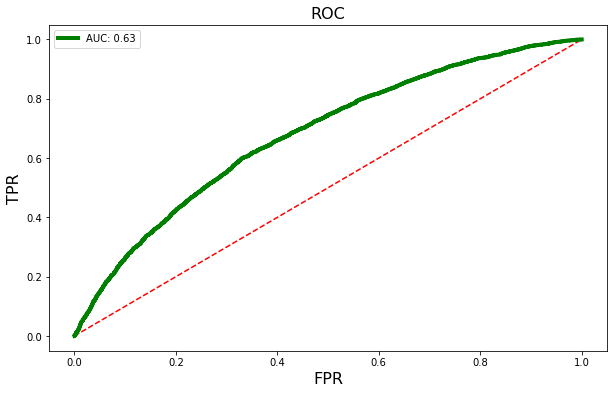

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

probs = clf.predict_proba(X_test_reduced)

probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test, y_test_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();

10. __¿Cuánto score se obtiene con la curva ROC?__

11. __¿Cuál es la calidad del modelo según la curva ROC?__

Regla de dedo para un área bajo la curva en una curva ROC es:

- [0.5]: Equivalente a aleatorio.
- [0.5, 0.6): Test malo.
- [0.6, 0.75): Test regular.
- [0.75, 0.9): Test bueno.
- [0.9, 0.95): Test muy bueno.
- [0.95, 1): Muy bueno para ser cierto.

***
__Contesta en el foro: ¿Que estrategias puedes tomar para mejorarlo?__

12. Guarda tu libreta y colócala en una carpeta comprimida con extensión .zip. Sube el archivo .zip a la plataforma de EdX y califica los ejercicios de tus demás compañeros.

<img src="Anáhuac_edX.png" width="498" height="150" align="center"/>